<h1><center>Wrangle Analyze Data Project</center></h1>

### Importing Needed Packages

In [92]:
# importing useful packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import IPython
import re
import seaborn as sns
import datetime
import PIL
import glob

%matplotlib inline

## Gathering Files And Creating Dataframes

In [93]:
# Reading twitter archive file and assign a df as df_twitter_arch
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [94]:
# Downloading Image Predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [95]:
# Reading Image Predictions file and assign a df as df_img_pred
df_img_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

In [96]:
# As I can not get my Twitter developer credentials till now, That's why I can not get a file from Twitter directly.
# Opening tweet-jason file and assign a df as df_api
with open('tweet-json.txt') as file:
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing dataframes.

### Visual Assessment

In [97]:
# Display df_twitter_arch
df_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [98]:
# Display df_img_pred
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [99]:
# Display df_api
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Programmatic Assessment

Programmatic Assessment for df_twitter_arch

In [100]:
# Displaying df_twitter_arch information
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [101]:
# Cheacking if there any duplicated tweet_id
df_twitter_arch.tweet_id.duplicated().sum()

0

In [102]:
# Checking if there invalid denominator lager than normal = 10
df_twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [103]:
# Checking if there invalid denominator and numerator and the max number by .describe()
df_twitter_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [104]:
# Checking if there invalid names by istitle() and unique().
df_twitter_arch[~df_twitter_arch.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [105]:
# Checking if there retweets in text column should be removed.
# Creating a variable to search for text starts with "RT" as a retweet text.
search = 'RT'
# Searching for texts starts with "RT" in text column.
df_twitter_arch[df_twitter_arch['text'].str.startswith(search)]    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


Programmatic Assessment for df_img_pred

In [106]:
# Displaying df_img_pred information
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
# Cheacking if there any duplicated tweet_id
df_img_pred.tweet_id.duplicated().sum()

0

In [108]:
# Cheacking if there any duplicated jpg_url
df_img_pred.jpg_url.duplicated().sum()

66

In [109]:
    # Checking img_num Column is it usless or not
    df_img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [110]:
# Checking img_num column has value =4 to be sure that it's usless
df_img_pred.query('img_num == 4 ')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


Programmatic Assessment for df_api

In [111]:
# Displaying df_api information
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [112]:
# Cheacking if there any duplicated id
df_api.id.duplicated().sum()

0

In [113]:
# Checking the max of retweets and favorite Counts
df_api[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


## Assessment Summary in points.

Completeness, Validity, Accuracy and consistency

df_twitter_arch

Quality<br><br>
 1- timestamp column is str instead of datetime<br>
 2- The rating_numerator column should of type float and also has invalid values it should be correctly extracted from text column.<br>
 3- There are retweets should be removed.<br>
 4- There are invalid names in name column should be removed.<br>
 5- Source has a link should be extracted to get only source and should be changed to category.<br>
 6- (doggo, floofer, puppe and puppo) Columns has none or missing values. <br><br><br>
 Tidiness<br><br>
 1- doggo, floofer, puppe and puppo columns should be merged in one column dog_types
 
 

df_img_pred

Quality<br><br>
 1- There is 66 duplicated url in jpg_url should be removed.<br>
 2- img_num is usless and should be removed. <br><br><br>
 Tidiness<br><br>
 1- p1_conf, p2_conf and p3_cong columns should be merged in one column confidence.<br>
 2- p1_dog, p2_dog and p3_dog columns should be merged in one column dog_type.

df_api

Quality<br><br>
 1- id column should be renamed to tweet_it <br>
 2- All columns are usless expet (id, favorite_count and retweet_count) and should be removed.

## Cleaning dataframes.

### Creating a copy from each dataframe to beging the cleaning process.

In [114]:
# Creating a copy from each dataframe to beging the cleaning process.
# Creating a copy from Twitter Archieve Dataframe to work on it.
df_twitter_arch_clean = df_twitter_arch.copy()
# Creating a copy from Image Predictions Dataframe to work on it.
df_img_pred_clean = df_img_pred.copy()
# Creating a copy from Twitter API Dataframe to work on it.
df_api_clean = df_api.copy()

### Cleaning Twitter Archive from (df_twitter_arch to df_twitter_arch clean)

Timestamp column in df_twitter_arch is str. And need to be changed to datetime.

Code

In [115]:
# Changing the timestamp column type from str to datetime type.
df_twitter_arch_clean.timestamp = pd.to_datetime(df_twitter_arch_clean.timestamp)

Test

In [116]:
df_twitter_arch_clean.timestamp.dtype

datetime64[ns, UTC]

### expanded_urls has Nan values should be replaced

Code

In [117]:
# Replacing all NaN values in expanded_urls column with empty to avoid errors with wrangling.
df_twitter_arch_clean.expanded_urls.fillna('', inplace=True)

Test

In [118]:
df_twitter_arch_clean['expanded_urls'].isnull().sum()

0

### Removing all rows has values in retweets

Code

In [119]:
# Removing all rows that have values in retweeted_status_id column. 
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean.retweeted_status_id.isnull()]
# Removing all rows that have values in retweeted_status_user_id column. 
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean.retweeted_status_user_id.isnull()]
# Removing all rows that have values in retweeted_status_timestamp column. 
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean.retweeted_status_timestamp.isnull()]

Test

In [120]:
df_twitter_arch_clean.retweeted_status_id.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: retweeted_status_id, dtype: float64

Test

In [121]:
df_twitter_arch_clean.retweeted_status_user_id.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: retweeted_status_user_id, dtype: float64

Test

In [122]:
df_twitter_arch_clean.retweeted_status_timestamp.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: retweeted_status_timestamp, dtype: object

The rating_numerator column should of type float and also has invalid values it should be correctly extracted from text column.

Code

In [123]:
# Extracting the correct raiting_numerator from text column by using RegEx.
ext_rating = df_twitter_arch_clean[df_twitter_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
ext_rating

,0
45,13.5
695,9.75
763,11.27
1689,9.5
1712,11.26


In [124]:
# Adding the correct values to raiting_numerator column
df_twitter_arch_clean.loc[ext_rating.index, 'rating_numerator'] = ext_rating.values

In [125]:
# Changing the raiting_numerator to float
df_twitter_arch_clean.rating_numerator = df_twitter_arch_clean.rating_numerator.astype('float')

Test

In [126]:
df_twitter_arch_clean.rating_numerator.dtype

dtype('float64')

### The rating_denominator column has invalid values should be removed.

Code

In [127]:
# Removing all values greater than the normal rating denominator > 10.
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean['rating_denominator'] == 10]

Test

In [128]:
df_twitter_arch_clean.rating_denominator.describe()

count    2153.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### There are retweets should be removed with RT start.

Code

In [129]:
# Removing all retweets rows from text column that starts with "RT"
df_twitter_arch = df_twitter_arch[~df_twitter_arch['text'].str.startswith('RT')]

Test

In [130]:
df_twitter_arch[df_twitter_arch['text'].str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### There are invalid names in name column should be removed.

Code

In [131]:
# detecting the invalid names from the name column
df_twitter_arch_clean[~df_twitter_arch_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [132]:
# Replacing the typo names to be correct.
df_twitter_arch_clean.name.replace(['DonDon','CeCe',],['Dondon','Cece'], inplace=True)

In [133]:
# detecting the invalid names from the name column after correcting some.
df_twitter_arch_clean[~df_twitter_arch_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [134]:
# Replacing all invalid names by np.nan.
df_twitter_arch_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ','None'],np.nan , inplace=True)

Test

In [135]:
df_twitter_arch_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### There are row has not data for dogs should be removed. 

Code

In [136]:
# There are row has not data for dogs should be removed. 
df_twitter_arch_clean = df_twitter_arch_clean[~df_twitter_arch_clean.text.isnull()]
df_twitter_arch_clean = df_twitter_arch_clean.loc[~df_twitter_arch_clean.text.str.match('.*only rate dogs')]

Test

In [137]:
df_twitter_arch_clean.loc[df_twitter_arch_clean.text.str.match('.*only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Source has a link should be extracted to get only source and should be changed to category.

In [138]:
# Source has a link should be extracted to get only source and should be changed to category.
df_twitter_arch_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Code

In [139]:
def find_source(x):
    frist= x.find('>') + 1
    secound =x[frist:].find('<')
    return x[frist:][:secound]

In [140]:
df_twitter_arch_clean.source = df_twitter_arch_clean.source.apply(lambda x: find_source(x)).astype('category')

Test

In [141]:
df_twitter_arch_clean.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

### (doggo, floofer, puppe and puppo) Columns has none or missing values.

Code

In [142]:
dogs_types = ['doggo', 'floofer', 'pupper', 'puppo']
# creating a list to creat the loop
for types in dogs_types:
    df_twitter_arch_clean[dogs_types] = df_twitter_arch_clean[dogs_types].replace('None', np.nan)

In [143]:
# doggo, floofer, puppe and puppo columns should be merged in one column dog_types
dogs_type = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_arch_clean['dog_stage'] = df_twitter_arch_clean[dogs_type].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
df_twitter_arch_clean.dog_stage = df_twitter_arch_clean.dog_stage.replace('', np.nan)
df_twitter_arch_clean = df_twitter_arch_clean.drop(columns = dogs_type, axis =1)

Test

In [144]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2098 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2098 non-null   datetime64[ns, UTC]
 4   source                      2098 non-null   category           
 5   text                        2098 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2098 non-null   object             
 10  rating_numerator            2098 non-null   float64         

### Removing all retweet columns.

Code

In [145]:
# Removing all retweet columns.
dropped_columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id']
df_twitter_arch_clean.drop(columns = dropped_columns, axis=1, inplace=True)

Test

In [146]:
list(df_twitter_arch_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

### Cleaning Image Predictions from ( df_img_pred to df_img_pred_clean )

### There is 66 duplicated url in jpg_url should be removed.

In [147]:
# There is 66 duplicated url in jpg_url should be removed.
df_img_pred_clean = df_img_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

Test

In [148]:
df_img_pred_clean.jpg_url.duplicated().sum()

0

### p1_conf, p2_conf and p3_cong columns should be merged in one column confidence and p1_dog, p2_dog and p3_dog columns should be merged in one column dog_type.

Code

In [149]:
# p1_conf, p2_conf and p3_cong columns should be merged in one column confidence and p1_dog, p2_dog and p3_dog columns should be merged in one column dog_type.

dog_type = []
confidence_list = []
def image(df_img_pred_clean):
    if df_img_pred_clean['p1_dog'] == True:
        dog_type.append(df_img_pred_clean['p1'])
        confidence_list.append(df_img_pred_clean['p1_conf'])
    elif df_img_pred_clean['p2_dog'] == True:
        dog_type.append(df_img_pred_clean['p2'])
        confidence_list.append(df_img_pred_clean['p2_conf'])
    elif df_img_pred_clean['p3_dog'] == True:
        dog_type.append(df_img_pred_clean['p3'])
        confidence_list.append(df_img_pred_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

df_img_pred_clean.apply(image, axis=1)

df_img_pred_clean['dog_type'] = dog_type
df_img_pred_clean['confidence'] = confidence_list

In [150]:
# Cleaning errors
df_img_pred_clean = df_img_pred_clean[df_img_pred_clean['dog_type'] != 'Error']

Test

In [151]:
df_img_pred_clean.dog_type.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'golden_retriever',
       'miniature_poodle', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'Newfoundland', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Irish_terrier', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'Rottweiler', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'boxer',
       'Eskim

In [152]:
df_img_pred_clean.confidence.unique()

array([0.465074, 0.506826, 0.596461, ..., 0.168086, 0.716012, 0.323581],
      dtype=object)

### img_num is usless and should be removed and all unnecessary columns.

Code

In [153]:
# img_num is usless and should be removed and all unnecessary columns.
df_img_pred_clean = df_img_pred_clean.drop(['img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',], 1)

Test

In [154]:
list(df_img_pred_clean.columns)

['tweet_id', 'jpg_url', 'dog_type', 'confidence']

In [155]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1691 non-null   int64 
 1   jpg_url     1691 non-null   object
 2   dog_type    1691 non-null   object
 3   confidence  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


### Cleaning Twitter API from ( df_api to df_api_clean )

### id column should be renamed to tweet_it

Code

In [156]:
# id column should be renamed to tweet_it
df_api_clean = df_api_clean.rename(columns={'id':'tweet_id'})

Test

In [157]:
list(df_api_clean.columns)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

### All columns are usless expet (id, favorite_count and retweet_count) and should be removed.

Code

In [158]:
# All columns are usless expet (id, favorite_count and retweet_count) and should be removed.
df_api_clean = df_api_clean.drop(['created_at',
'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status','favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status'], 1)

Test

In [159]:
list(df_api_clean.columns)

['tweet_id', 'retweet_count', 'favorite_count']

In [160]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Storing and Acting on Wrangled Data

In [161]:
# Merging all data frames in one data frame (df_twitter_arch_clean,df_img_pred_clean and df_api_clean) in df_master
df_master = pd.merge(df_twitter_arch_clean, df_img_pred_clean, on='tweet_id')
df_master = pd.merge(df_master, df_api_clean, on='tweet_id')

In [162]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561 entries, 0 to 1560
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1561 non-null   int64              
 1   timestamp           1561 non-null   datetime64[ns, UTC]
 2   source              1561 non-null   category           
 3   text                1561 non-null   object             
 4   expanded_urls       1561 non-null   object             
 5   rating_numerator    1561 non-null   float64            
 6   rating_denominator  1561 non-null   int64              
 7   name                1136 non-null   object             
 8   dog_stage           251 non-null    object             
 9   jpg_url             1561 non-null   object             
 10  dog_type            1561 non-null   object             
 11  confidence          1561 non-null   object             
 12  retweet_count       1561 non-null 

### Save new dataframe to twitter_archive_master.csv

In [163]:
df_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [164]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


## Visualizations

### Top 5 Dog Types 

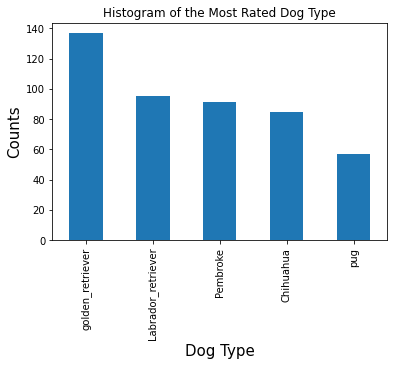

In [165]:
df_dog_type = df_master.groupby('dog_type').filter(lambda x: len(x) >= 55)

df_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Dog Type' , fontsize=15)
plt.ylabel('Counts', fontsize=15)

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Ratings Frequesncy

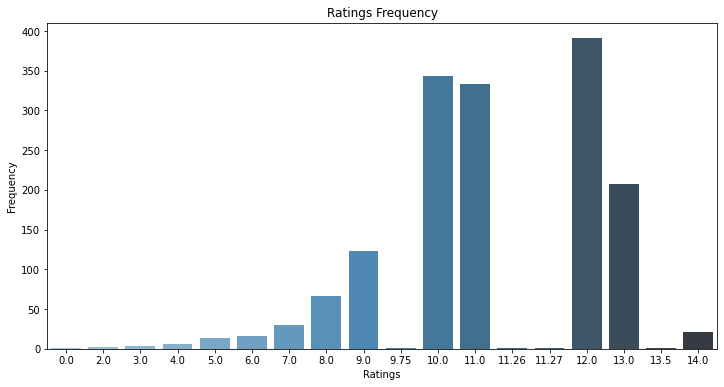

In [166]:
data = df_master.rating_numerator.value_counts()

x = data.index
y = data.values
fig, mn = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=mn)
mn.set(xlabel='Ratings', ylabel='Frequency', title='Ratings Frequency')
plt.show()

### Chart Between Favorites Count and Retweet Count

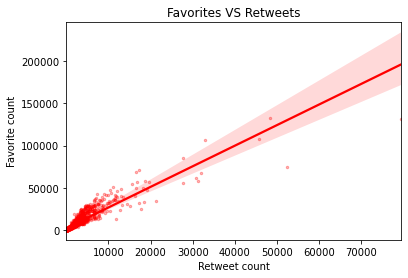

In [167]:
mn = sns.regplot(x='retweet_count', y='favorite_count', data=df_master, color='r', scatter_kws={'s':6, 'alpha':.3}) 
mn.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorites VS Retweets')
plt.show()

### Dogs Stage Count

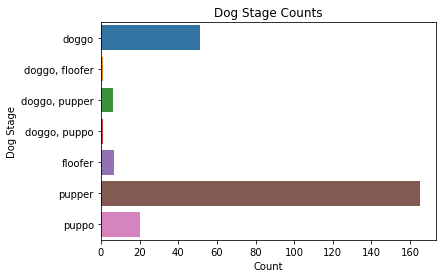

In [168]:
data = df_master.groupby('dog_stage').count()['tweet_id']
mn = sns.barplot(y=data.index, x=data.values)
mn.set(xlabel='Count', ylabel='Dog Stage', title='Dog Stage Counts')
plt.show()

### Chart to explain the most used source

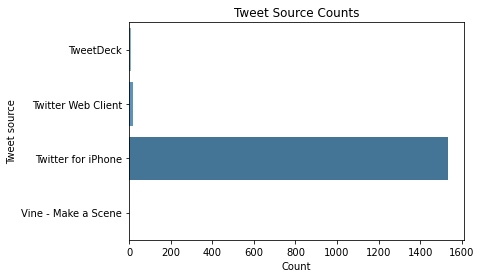

In [169]:
data = df_master.groupby('source').count()['tweet_id']
mn = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
mn.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.show()

### Top 5 Frequent Names

In [170]:
n = 5
top_five_names = df_master['name'].value_counts()[:n].index.tolist()
top_five_names

['Lucy', 'Cooper', 'Charlie', 'Oliver', 'Tucker']

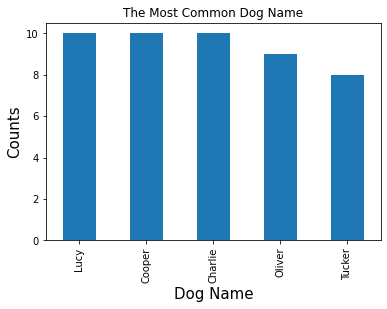

In [171]:
df_dog_name = df_master.groupby('name').filter(lambda x: len(x) >= 8)

df_dog_name['name'].value_counts().plot(kind = 'bar')
plt.title('The Most Common Dog Name')
plt.xlabel('Dog Name' , fontsize=15)
plt.ylabel('Counts', fontsize=15)

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Top Retweeted Dog


In [172]:
# Getting the max retweet count
df_master.retweet_count.describe()

count     1561.000000
mean      2502.057655
std       4279.890452
min         16.000000
25%        611.000000
50%       1328.000000
75%       2915.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [173]:
# Getting the top retweeted index
df_master.query('retweet_count == 79515 ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence,retweet_count,favorite_count
626,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,79515,131075


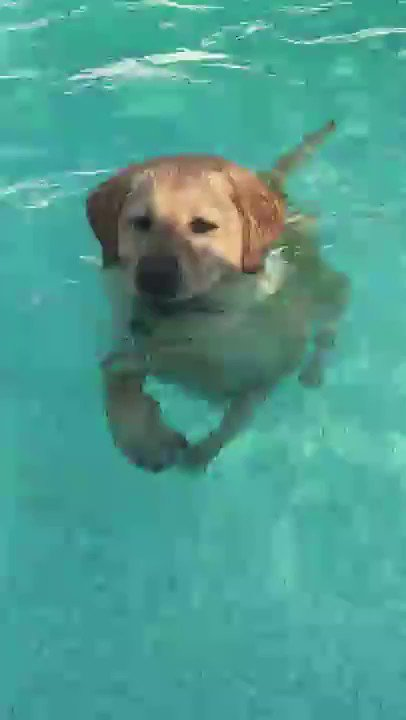

In [174]:
# Displaying the top retweeted dog photo
ind = 626
url = df_master.iloc[ind, df_master.columns.get_loc('jpg_url')]
img = IPython.display.Image(url)
img

In [175]:
# Displaying the top retweeted dog tweet text
df_master.iloc[ind, df_master.columns.get_loc('text')]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

### Top Favorite Dog

In [176]:
# Getting the max favorite count
df_master.favorite_count.describe()

count      1561.000000
mean       8427.795003
std       11555.136731
min          81.000000
25%        2040.000000
50%        4065.000000
75%       10512.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [177]:
# Getting the top favorite index
df_master.query('favorite_count == 132810 ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence,retweet_count,favorite_count
260,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,48265,132810


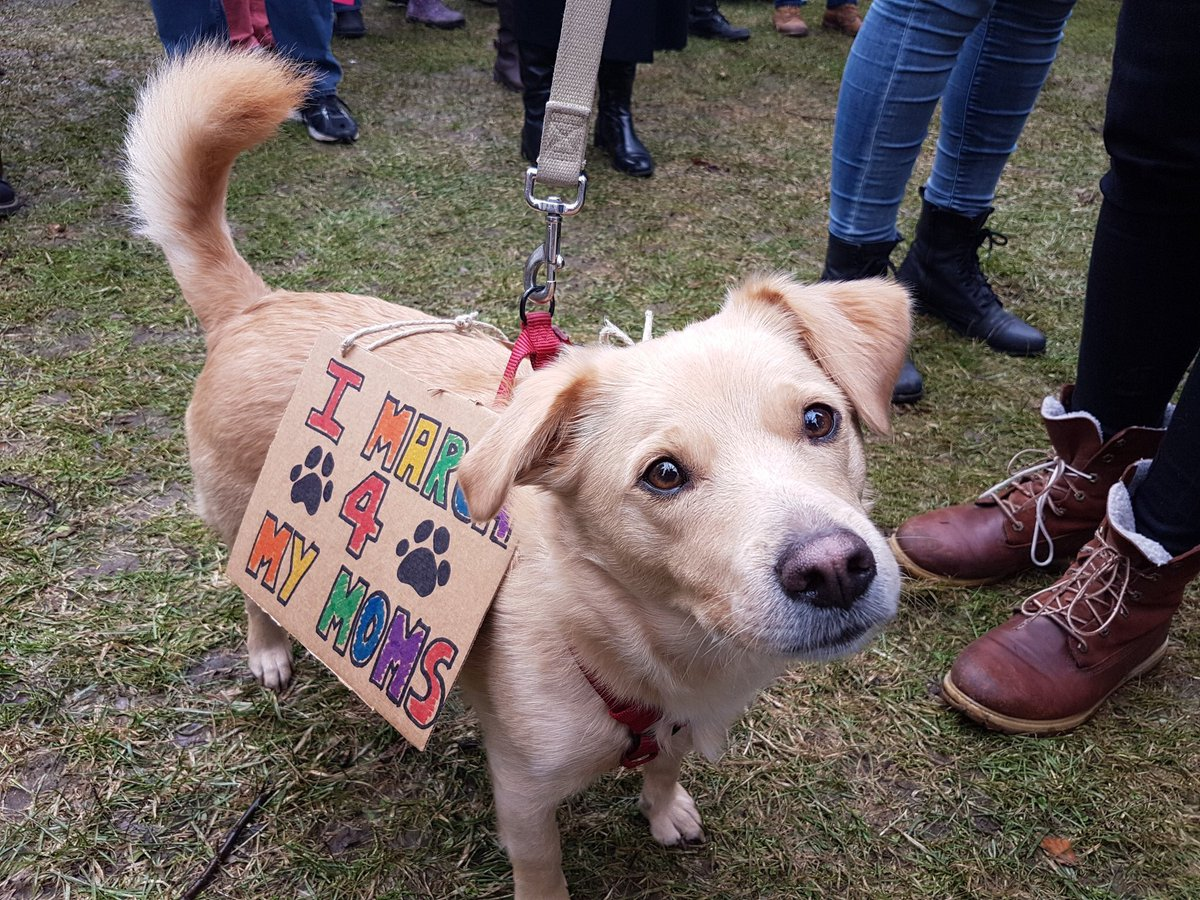

In [178]:
# Displaying the top favorite dog photo
ind=260
url = df_master.iloc[ind, df_master.columns.get_loc('jpg_url')]
img = IPython.display.Image(url)
img

In [179]:
# Displaying the top favorite dog tweet text
df_master.iloc[ind, df_master.columns.get_loc('text')]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

<h1><center>Thank You</center></h1>

<h1><center>Created By:</center></h1>

<h1><center>Mahmoud Hassan Khalil El-Tobgy</center></h1>